In [28]:
import networkx as nx
import random

In [29]:
random.seed(42)
dummy = nx.DiGraph()
num_nodes = 10
prob = 0.3
dummy.add_nodes_from(range(num_nodes))
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j and random.random() < prob:
            weight = random.uniform(100, 500)
            dummy.add_edge(i, j, weight=weight)

print("Edge weights:")
for edge in dummy.edges:
    print(f"{edge}: {dummy.edges[edge]['weight']}")



Edge weights:
(0, 2): 210.0117273476477
(0, 3): 394.58848566560494
(0, 6): 268.7687278741082
(0, 7): 187.45518992144133
(0, 9): 179.5350602746594
(1, 3): 335.70627355036345
(1, 5): 422.32770073312315
(1, 8): 482.88522888271245
(2, 0): 138.68655073338562
(3, 6): 191.15931026061872
(3, 7): 131.91679076945098
(3, 8): 140.40057176389166
(3, 9): 354.27377770576004
(4, 2): 206.79112881964534
(4, 7): 391.6507191801397
(4, 8): 251.78217670305912
(5, 6): 112.84009756161511
(5, 8): 184.3931374345306
(6, 7): 198.65100307759337
(6, 9): 333.8343960894162
(7, 2): 499.0150425980441
(7, 4): 118.84655016989383
(7, 5): 350.978416681236
(7, 9): 252.6477146026147
(8, 4): 388.28872774407785
(8, 7): 356.3847194319232
(8, 9): 273.906100267642
(9, 3): 300.23444522011937
(9, 4): 465.0511357379282
(9, 6): 355.5797979464021
(9, 8): 405.0043200300605


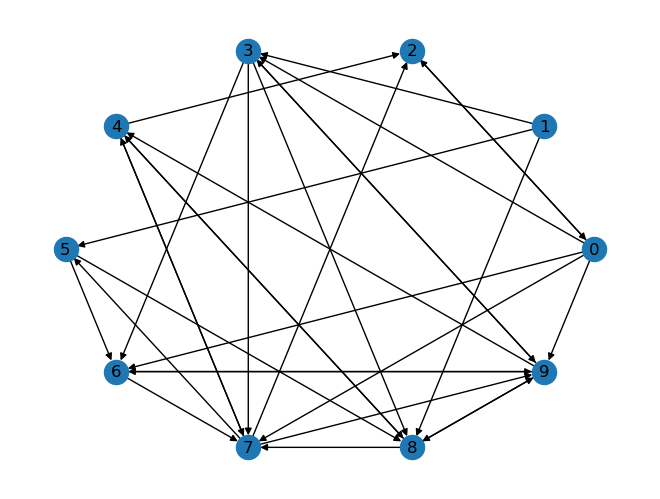

In [30]:
nx.draw(dummy, pos=nx.circular_layout(dummy), with_labels=True, node_size=300)